In [1]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname,_,filenames in os.walk("C:/Users/RISHABH/Desktop/Machine Learning/datasets"):
    for filename in filenames:
        print(os.path.join(dirname,filename))
    

C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (1).gif
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (1).jpeg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (1).jpg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (1).png
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (12).jpeg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (12).jpg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (13).jpeg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (13).jpg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (14).jpeg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (18).jpeg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (2).jpeg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (2).jpg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (3).jpeg
C:/Users/RISHABH/Desktop/Machine Learning/datasets\test\Acne\2 (

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
   "C:/Users/RISHABH/Desktop/Machine Learning/datasets/train",  
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "C:/Users/RISHABH/Desktop/Machine Learning/datasets/test", 
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')


Found 588 images belonging to 5 classes.
Found 166 images belonging to 5 classes.


In [10]:
NUM_CLASSES=5
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # Adjust NUM_CLASSES
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=test_generator)

Epoch 1/40
13/19 [===================>..........] - ETA: 2s - loss: 1.6773 - accuracy: 0.2071

C:\Users\RISHABH\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


19/19 [==============================] - 12s 587ms/step - loss: 1.6422 - accuracy: 0.2279 - val_loss: 1.5636 - val_accuracy: 0.1988
Epoch 2/40
19/19 [==============================] - 10s 544ms/step - loss: 1.4976 - accuracy: 0.3401 - val_loss: 1.3517 - val_accuracy: 0.4458
Epoch 3/40
19/19 [==============================] - 11s 570ms/step - loss: 1.3744 - accuracy: 0.3946 - val_loss: 1.2766 - val_accuracy: 0.4398
Epoch 4/40
19/19 [==============================] - 11s 564ms/step - loss: 1.3211 - accuracy: 0.4320 - val_loss: 1.1505 - val_accuracy: 0.5602
Epoch 5/40
19/19 [==============================] - 11s 569ms/step - loss: 1.2493 - accuracy: 0.4762 - val_loss: 1.0414 - val_accuracy: 0.6205
Epoch 6/40
19/19 [==============================] - 11s 578ms/step - loss: 1.2579 - accuracy: 0.4694 - val_loss: 1.0420 - val_accuracy: 0.5723
Epoch 7/40
19/19 [==============================] - 11s 582ms/step - loss: 1.1616 - accuracy: 0.5068 - val_loss: 1.0443 - val_accuracy: 0.5663
Epoch 8/40

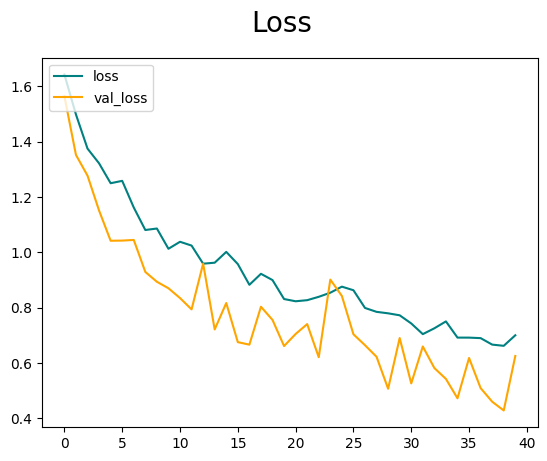

In [11]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

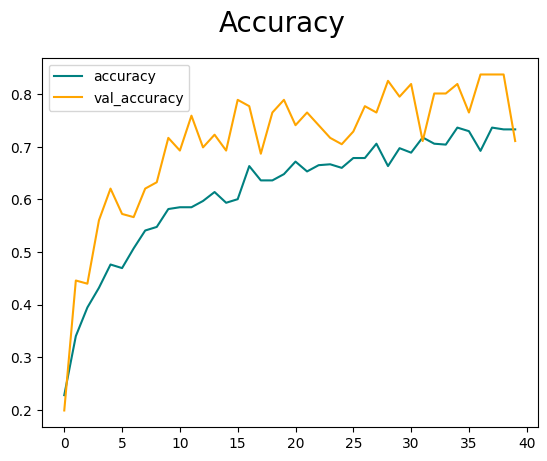

In [12]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [13]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [14]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [20]:
import numpy as np
all_batches_X = []
all_batches_y = []
for i in range(len(test_generator)):
    batch = next(test_generator)
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    all_batches_X.append(X)
    all_batches_y.append(y)
all_batches_X = np.concatenate(all_batches_X, axis=0)
all_batches_y = np.concatenate(all_batches_y, axis=0)

1/1 [==============================] - 0s 94ms/step


In [21]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.75, shape=(), dtype=float32) tf.Tensor(0.6686747, shape=(), dtype=float32) tf.Tensor(0.88915664, shape=(), dtype=float32)


In [22]:
import cv2

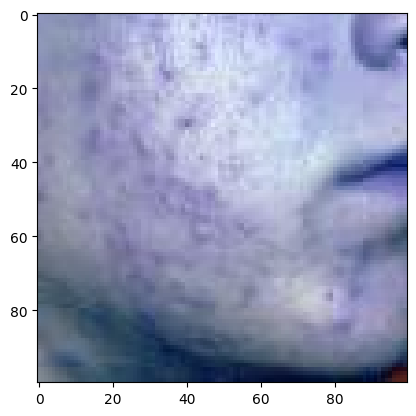

In [23]:
img = cv2.imread("C:/Users/RISHABH/Desktop/Machine Learning/datasets/test/Acne/2 (1).jpeg")
plt.imshow(img)
plt.show()

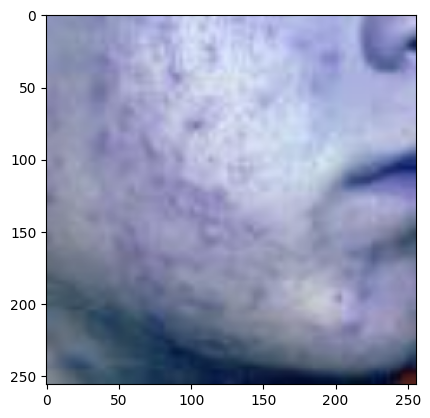

In [25]:
import tensorflow as tf
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_path = "C:/Users/RISHABH/Desktop/Machine Learning/datasets/test/Acne/2 (1).jpeg"
image = load_img(image_path, target_size=(128, 128))
image_array = img_to_array(image)
image_array = image_array / 255.0  
image_array = np.expand_dims(image_array, axis=0) 
yhat=model.predict(image_array)

1/1 [==============================] - 0s 46ms/step


In [38]:
predicted_class_index = np.argmax(yhat[0])
predicted_class_label = class_labels[predicted_class_index]
print("Predicted disease:", predicted_class_label)

Predicted disease: Acne
